# Export raster to a .tif format

In [1]:
import rasterio
from matplotlib import pyplot
import numpy
import matplotlib.pyplot as plt
%matplotlib inline

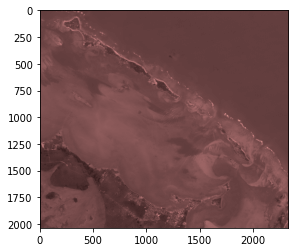

In [52]:
# let’s read the bands using rasterio 
raster = rasterio.open('20210523_RGB.tif')
pyplot.imshow(raster.read(1), cmap='pink')

In [27]:
# Information about raster
raster.crs
print(raster.width)
print(raster.height)
raster.shape
raster.meta

2325
2036


{'driver': 'GTiff',
 'dtype': 'uint16',
 'nodata': 0.0,
 'width': 2325,
 'height': 2036,
 'count': 5,
 'crs': CRS.from_epsg(32618),
 'transform': Affine(10.0, 0.0, 281830.0,
        0.0, -10.0, 2956190.0)}

In [91]:
# Normalize bands into 0.0 - 1.0 scale
def normalize(array):
    array_min, array_max = array.min(), array.max()
    return (array - array_min) / (array_max - array_min)

# Convert to numpy arrays
red = raster.read(4)
green = raster.read(3)
blue = raster.read(2)

# Normalize band DN
nir_norm = normalize(red)
red_norm = normalize(green)
green_norm = normalize(blue)

#  Stack normaliz bands into an n-dimensional array using numpy.stack() method
nrg = numpy.dstack((nir_norm, red_norm, green_norm))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


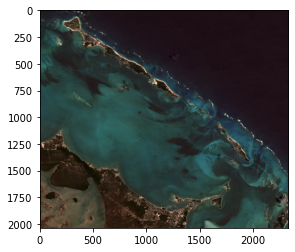

In [102]:
plt.imshow(nrg*3)

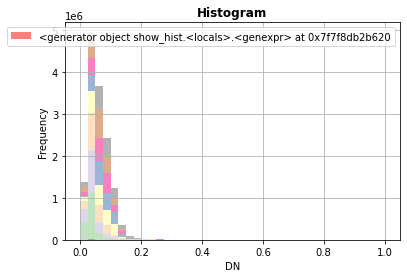

In [103]:
from rasterio.plot import show_hist
show_hist(nrg, bins=40, lw=0.0, stacked=True, alpha=0.5,
          histtype='stepfilled', title="Histogram")

In [104]:
# Read the grid values into numpy arrays
red = raster.read(1)
green = raster.read(2)
blue = raster.read(3)

print("Before bands")
print(red.min(), '-', red.max(), 'mean:', red.mean())
print(green.min(), '-', green.max(), 'mean:', green.mean())
print(blue.min(), '-', blue.max(), 'mean:', blue.mean())

# Calculate for each band
def normal(array):
    array_new = array*10
    #array_new = array_new.astype("uint16")
    return array_new

# Normalize the bands
redbri = normal(red)
greenbri = normal(green)
bluebri = normal(blue)

print("After bands")
print(redbri.min(), '-', redbri.max(), 'mean:', redbri.mean())
print(greenbri.min(), '-', greenbri.max(), 'mean:', greenbri.mean())
print(bluebri.min(), '-', bluebri.max(), 'mean:', bluebri.mean())

Before bands
1075 - 7793 mean: 1862.2384103344107
981 - 12678 mean: 1713.476538225912
736 - 12688 mean: 1508.2081593679363
After bands
1174 - 65480 mean: 18622.2318131694
124 - 65150 mean: 17134.54386927773
574 - 65220 mean: 15081.79085789129


In [105]:
# Save into a tif file
rgb=rasterio.open('output.tiff', 'w', driver='Gtiff',
                          width=raster.width, height=raster.height,
                          count=3,
                          crs=raster.crs,
                          transform=raster.transform,
                          dtype='uint16')
rgb.write(redbri,1)
rgb.write(greenbri,2)
rgb.write(bluebri,3)
rgb.close()